<a href="https://www.kaggle.com/code/nazarmohammed/53-transfer-learning-fine-tuning-vs-feature?scriptVersionId=141535913" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,BatchNormalization
from tensorflow.keras.utils import image_dataset_from_directory

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

import matplotlib.pyplot as plt

In [2]:
conv_base = VGG16(weights='imagenet', include_top=False,input_shape=(150,150,3))

58900480/58889256 [==============================] - 0s 0us/step


In [3]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

for layer in conv_base.layers:
    print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [4]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

## In the above we can see that the last layer is the pooling layer it means that it is a convolutional layer ok

## From here we are creating your own Sequential layer

In [5]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [7]:
#conv_base.trainable = False  ## This will frez the convolutional layers of the above parameters

In [8]:
train_ds = image_dataset_from_directory(directory = "/kaggle/input/dogs-vs-cats/dataset/training_set/",labels='inferred',label_mode='int',batch_size=32,image_size=(150, 150))
validation_ds = image_dataset_from_directory(directory = "/kaggle/input/dogs-vs-cats/dataset/test_set/",labels='inferred',label_mode='int',batch_size=32,image_size=(150, 150))

Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [9]:
# Normalization
def process(image,label):
    image = tensorflow.cast(image/255,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-5),loss="binary_crossentropy",metrics=["accuracy"])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
250/250 [==============================] - 35s 101ms/step - loss: 0.2839 - accuracy: 0.8792 - val_loss: 0.2082 - val_accuracy: 0.9090
Epoch 2/10
250/250 [==============================] - 15s 60ms/step - loss: 0.1524 - accuracy: 0.9377 - val_loss: 0.1780 - val_accuracy: 0.9295
Epoch 3/10
250/250 [==============================] - 15s 58ms/step - loss: 0.1048 - accuracy: 0.9613 - val_loss: 0.1656 - val_accuracy: 0.9340
Epoch 4/10
250/250 [==============================] - 16s 61ms/step - loss: 0.0713 - accuracy: 0.9755 - val_loss: 0.1733 - val_accuracy: 0.9310
Epoch 5/10
250/250 [==============================] - 15s 58ms/step - loss: 0.0455 - accuracy: 0.9885 - val_loss: 0.1656 - val_accuracy: 0.9360
Epoch 6/10
250/250 [==============================] - 16s 62ms/step - loss: 0.0284 - accuracy: 0.9939 - val_loss: 0.1805 - val_accuracy: 0.9365
Epoch 7/10
250/250 [==============================] - 15s 60ms/step - loss: 0.0169 - accuracy: 0.9967 - val_loss: 0.1916 - val_accuracy

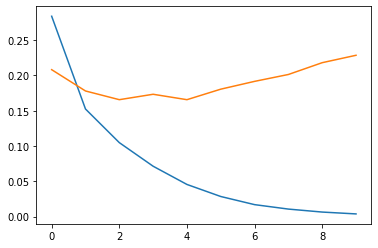

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

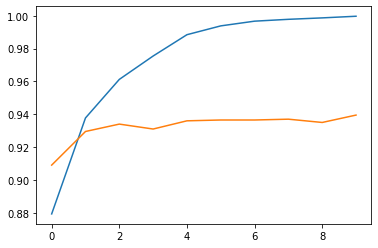

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [14]:
import cv2

In [15]:
test_img = cv2.imread("/kaggle/input/dogs-vs-cats/dataset/sample/cat_or_dog_2.jpg")

In [16]:
img = cv2.resize(test_img,(256,256))

In [17]:
type(img)

numpy.ndarray

In [18]:
# Resize the image to (150, 150)
test_img = cv2.resize(test_img, (150, 150))

# Reshape the image
test_input = test_img.reshape((1, 150, 150, 3))

In [19]:
model.predict(test_input)

array([[0.]], dtype=float32)